In [1]:
#  Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace file paths with your actual paths or filenames
file_2021 = "Sales Data-Jan'21 to Dec'21.xlsx"

In [3]:
# Replace file paths with your actual paths or filenames
file_2022_2023 = "Sales Data - Jan'22 to Mar'23.xlsx"

In [4]:
# Replace file paths with your actual paths or filenames
file_2023_2025 = "Sales Data-Apr'23 to Jan'25.xlsx"

In [5]:
# Define a function to load and clean each file
def load_sales_data(path):
    df = pd.read_excel(path)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

In [6]:
# Load all three datasets
df1 = load_sales_data(file_2021)

In [7]:
# Load all three datasets
df2 = load_sales_data(file_2022_2023)

In [8]:
# Load all three datasets
df3 = load_sales_data(file_2023_2025)

In [9]:
#  Combine the Datasets
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [10]:
# Rename Billed Qty (CBM) for easier access
combined_df.rename(columns={"Billed Qty (CBM)": "Billed_Qty(CBM)"}, inplace=True)

In [11]:
# Convert Date column to datetime
combined_df["Date"] = pd.to_datetime(combined_df["Date"], errors="coerce")

In [12]:
# Extract year
combined_df["Year"] = combined_df["Date"].dt.year

In [13]:
# 1. Provide Details of the Combined Dataset

print("Dataset Shape:", combined_df.shape)

Dataset Shape: (488231, 39)


In [14]:
print("\n Columns:\n", combined_df.columns.tolist())


 Columns:
 ['Customer Name', 'Customer Code', 'Ship To Cust Code', 'Ship To Cust Name', 'Bill Type', 'C', 'Inv.No', 'ODN', 'BUS. PLACE', 'SO.No', 'Date', 'Week', 'Incoterms', 'PO.No', 'PI.No', 'Cust.Nature', 'Territory Code', 'Territory', 'Inv.Date', 'Brand', 'Sub-Brand', 'Prime Brand', 'Folder/Non-Folder', 'Material', 'Material Desc.', 'Division', 'Division Text', 'Thickness', 'Vol.CBM', 'Design(LAM)', 'Finish(LAM)', 'Billed Qty', 'Sales unit', 'Billed Qty(SQM)', 'Billed Qty(PCS)', 'Billed Qty(NA)', 'Billed_Qty(CBM)', 'Billed Qty (MT)', 'Year']


In [15]:
print("\n Sample Records:\n", combined_df.head())


 Sample Records:
   Customer Name  Customer Code  Ship To Cust Code Ship To Cust Name Bill Type  \
0  N.K. Traders     10016196.0         10016196.0      N.K. Traders      ZFAC   
1  N.K. Traders     10016196.0         10016196.0      N.K. Traders      ZFAC   
2  N.K. Traders     10016196.0         10016196.0      N.K. Traders      ZFAC   
3  N.K. Traders     10016196.0         10016196.0      N.K. Traders      ZFAC   
4  N.K. Traders     10016196.0         10016196.0      N.K. Traders      ZFAC   

     C        Inv.No           ODN BUS. PLACE         SO.No  ... Design(LAM)  \
0  NaN  2.027009e+09  F22027008891       PH01  1.129146e+09  ...         NaN   
1  NaN  2.027009e+09  F22027008891       PH01  1.129146e+09  ...         NaN   
2  NaN  2.027009e+09  F22027008891       PH01  1.129146e+09  ...         NaN   
3  NaN  2.027009e+09  F22027008891       PH01  1.129146e+09  ...         NaN   
4  NaN  2.027009e+09  F22027008891       PH01  1.129146e+09  ...         NaN   

   Finish(LAM

In [16]:
print("\n Null Values:\n", combined_df.isnull().sum())


 Null Values:
 Customer Name        293296
Customer Code        293296
Ship To Cust Code    293296
Ship To Cust Name    293296
Bill Type            293296
C                    485706
Inv.No               293296
ODN                  293296
BUS. PLACE           293296
SO.No                293296
Date                 293296
Week                 293296
Incoterms            293296
PO.No                488231
PI.No                488231
Cust.Nature          293296
Territory Code       293296
Territory            293296
Inv.Date             293296
Brand                488231
Sub-Brand            488231
Prime Brand          488231
Folder/Non-Folder    488231
Material             293296
Material Desc.       293296
Division             293296
Division Text        293296
Thickness            293296
Vol.CBM              293296
Design(LAM)          488231
Finish(LAM)          488231
Billed Qty           293296
Sales unit           293296
Billed Qty(SQM)      293296
Billed Qty(PCS)      293296
Bill

In [17]:
print("\n Year Range in Data:", combined_df["Year"].min(), "to", combined_df["Year"].max())


 Year Range in Data: 2020.0 to 2023.0


In [18]:
print(combined_df[combined_df["Year"].isin([2024, 2025])][["Year", "Billed_Qty(CBM)"]].describe())

# Since the count is 0 , that’s why they don’t show in the plot.

       Year  Billed_Qty(CBM)
count   0.0              0.0
mean    NaN              NaN
std     NaN              NaN
min     NaN              NaN
25%     NaN              NaN
50%     NaN              NaN
75%     NaN              NaN
max     NaN              NaN


In [19]:
# 2. Volume-wise Analysis using "Billed_Qty(CBM)"

# Total volume per year

volume_by_year = combined_df.groupby("Year")["Billed_Qty(CBM)"].sum()
volume_by_year = volume_by_year.reindex([2021, 2022, 2023, 2024, 2025], fill_value=0)

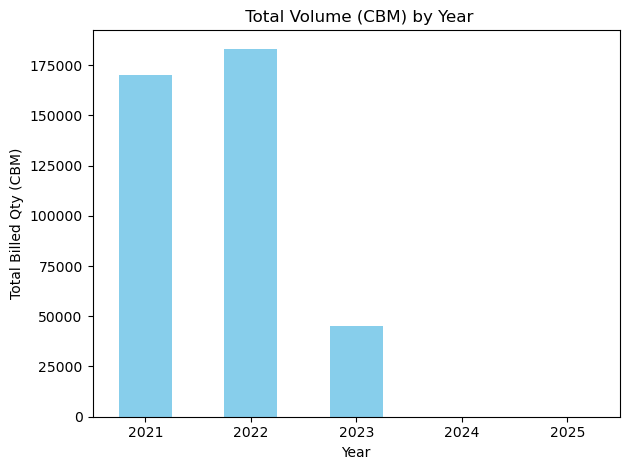

In [20]:
# Plot

volume_by_year.plot(kind='bar', title=" Total Volume (CBM) by Year", color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Billed Qty (CBM)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [21]:
print(volume_by_year)

Year
2021    170307.668
2022    183153.078
2023     45220.005
2024         0.000
2025         0.000
Name: Billed_Qty(CBM), dtype: float64


In [22]:
# 3. Extract Primary Columns for Focused Analysis

# Create filtered dataframe with primary columns

primary_df = combined_df[["Date", "Material", "Thickness", "Bill Type", "Billed_Qty(CBM)", "Year", "Territory"]].copy()

In [23]:
# Preview

print(primary_df.head())

        Date            Material  Thickness Bill Type  Billed_Qty(CBM)  \
0 2021-01-01  HMCI055PC18300305O       5.50      ZFAC            2.533   
1 2021-01-01  HMCI070PC18300305O       7.00      ZFAC            4.419   
2 2021-01-01  HMCI110PC19830610O      11.00      ZFAC            8.116   
3 2021-01-01  HMCI168PC18300610O      16.75      ZFAC            6.675   
4 2021-01-01  HMCI168PC18300305O      16.75      ZFAC            0.654   

     Year       Territory  
0  2021.0  Prelam -Jaipur  
1  2021.0  Prelam -Jaipur  
2  2021.0  Prelam -Jaipur  
3  2021.0  Prelam -Jaipur  
4  2021.0  Prelam -Jaipur  


In [24]:
# 4. Analysis of Negative Sales (Billed Volume < 0)

# Filter negative sales

negative_sales = primary_df[primary_df["Billed_Qty(CBM)"] < 0]

In [25]:
# Summary by Year and Material

neg_summary = negative_sales.groupby(["Year", "Material"])["Billed_Qty(CBM)"].sum().reset_index()

In [26]:
# Top 10 materials with highest negative volume

top_negative = negative_sales.groupby("Material")["Billed_Qty(CBM)"].sum().sort_values().head(10)

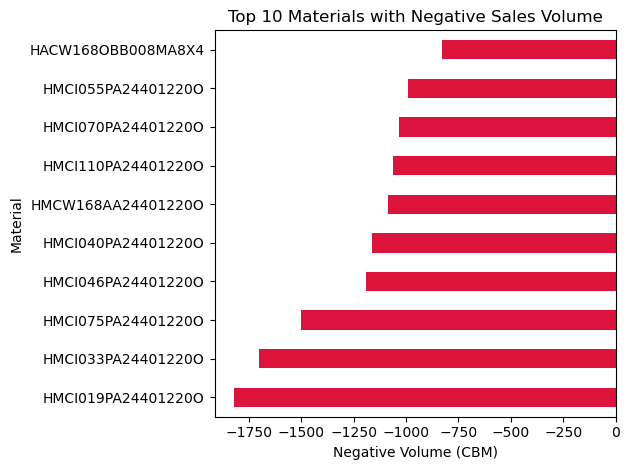

In [27]:
# Plot

top_negative.plot(kind='barh', color='crimson', title='Top 10 Materials with Negative Sales Volume')
plt.xlabel("Negative Volume (CBM)")
plt.tight_layout()
plt.show()

In [28]:
print("\n Negative Sales Summary (Year + Material):\n", neg_summary.head(10))


 Negative Sales Summary (Year + Material):
      Year            Material  Billed_Qty(CBM)
0  2020.0  HACW055OBB008MB8X4           -0.491
1  2020.0  HACW080BBB008MA8X4           -0.476
2  2020.0  HACW080BBB008MB8X4           -0.643
3  2020.0  HACW080BBB008SB8X4           -0.119
4  2020.0  HACW080BL0111MB8X4           -0.095
5  2020.0  HACW080BL0238MB8X4           -0.024
6  2020.0  HACW080BL4535MB8X4           -0.024
7  2020.0  HACW080BL4854MB8X4           -0.024
8  2020.0  HACW080OBB008MA8X4           -0.119
9  2020.0  HACW080OBB008SB8X4           -0.071


In [29]:
# 5. Year-wise Patterns: Volume, Material Codes, and Territories

#  Volume by Material Code by Year

material_yearly = combined_df.groupby(["Year", "Material"])["Billed_Qty(CBM)"].sum().unstack().fillna(0)

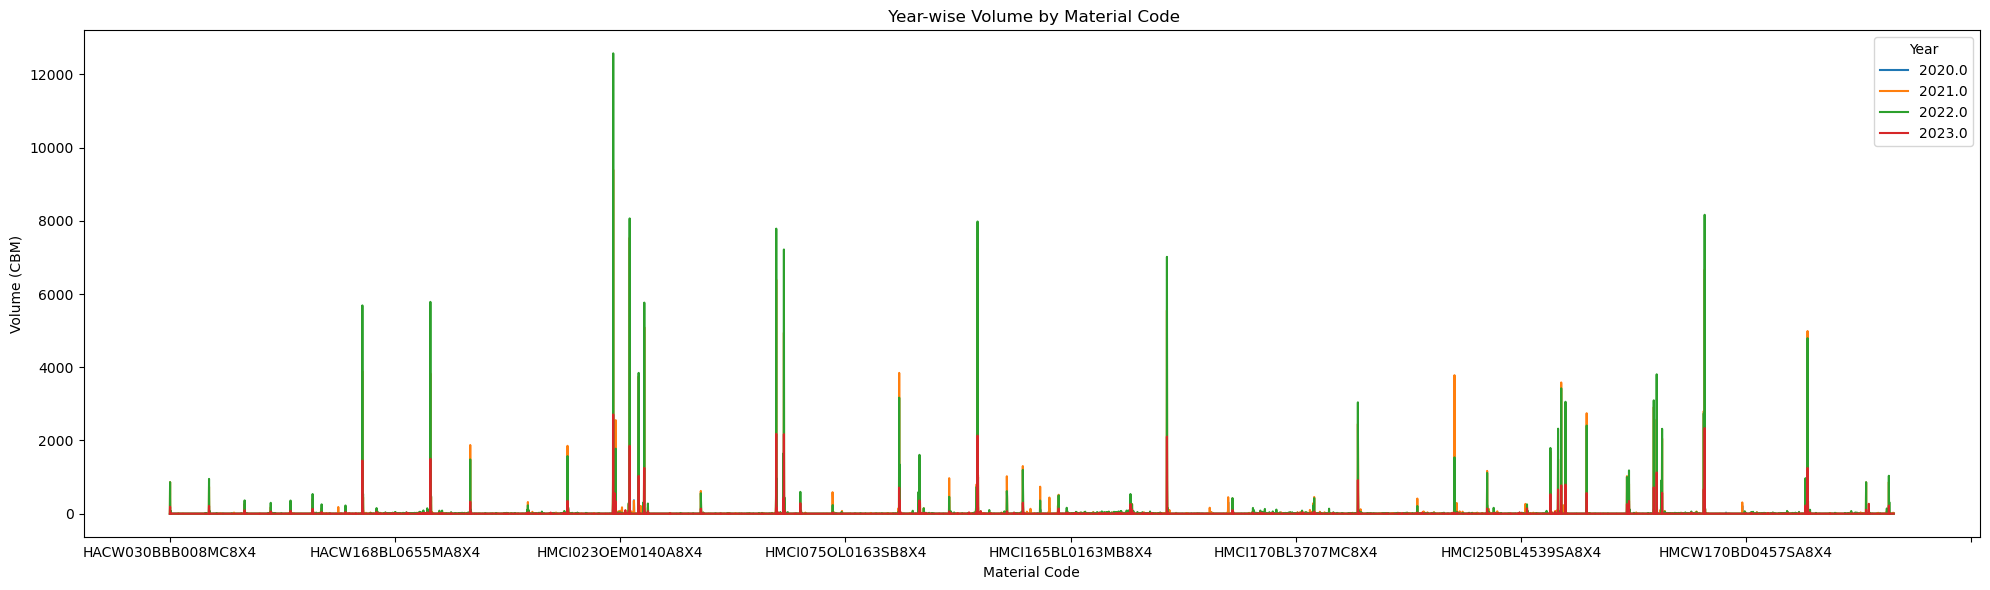

In [30]:
# Plot trends

material_yearly.T.plot(figsize=(20, 6), title=" Year-wise Volume by Material Code")
plt.ylabel("Volume (CBM)")
plt.xlabel("Material Code")
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16428\4145560815.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


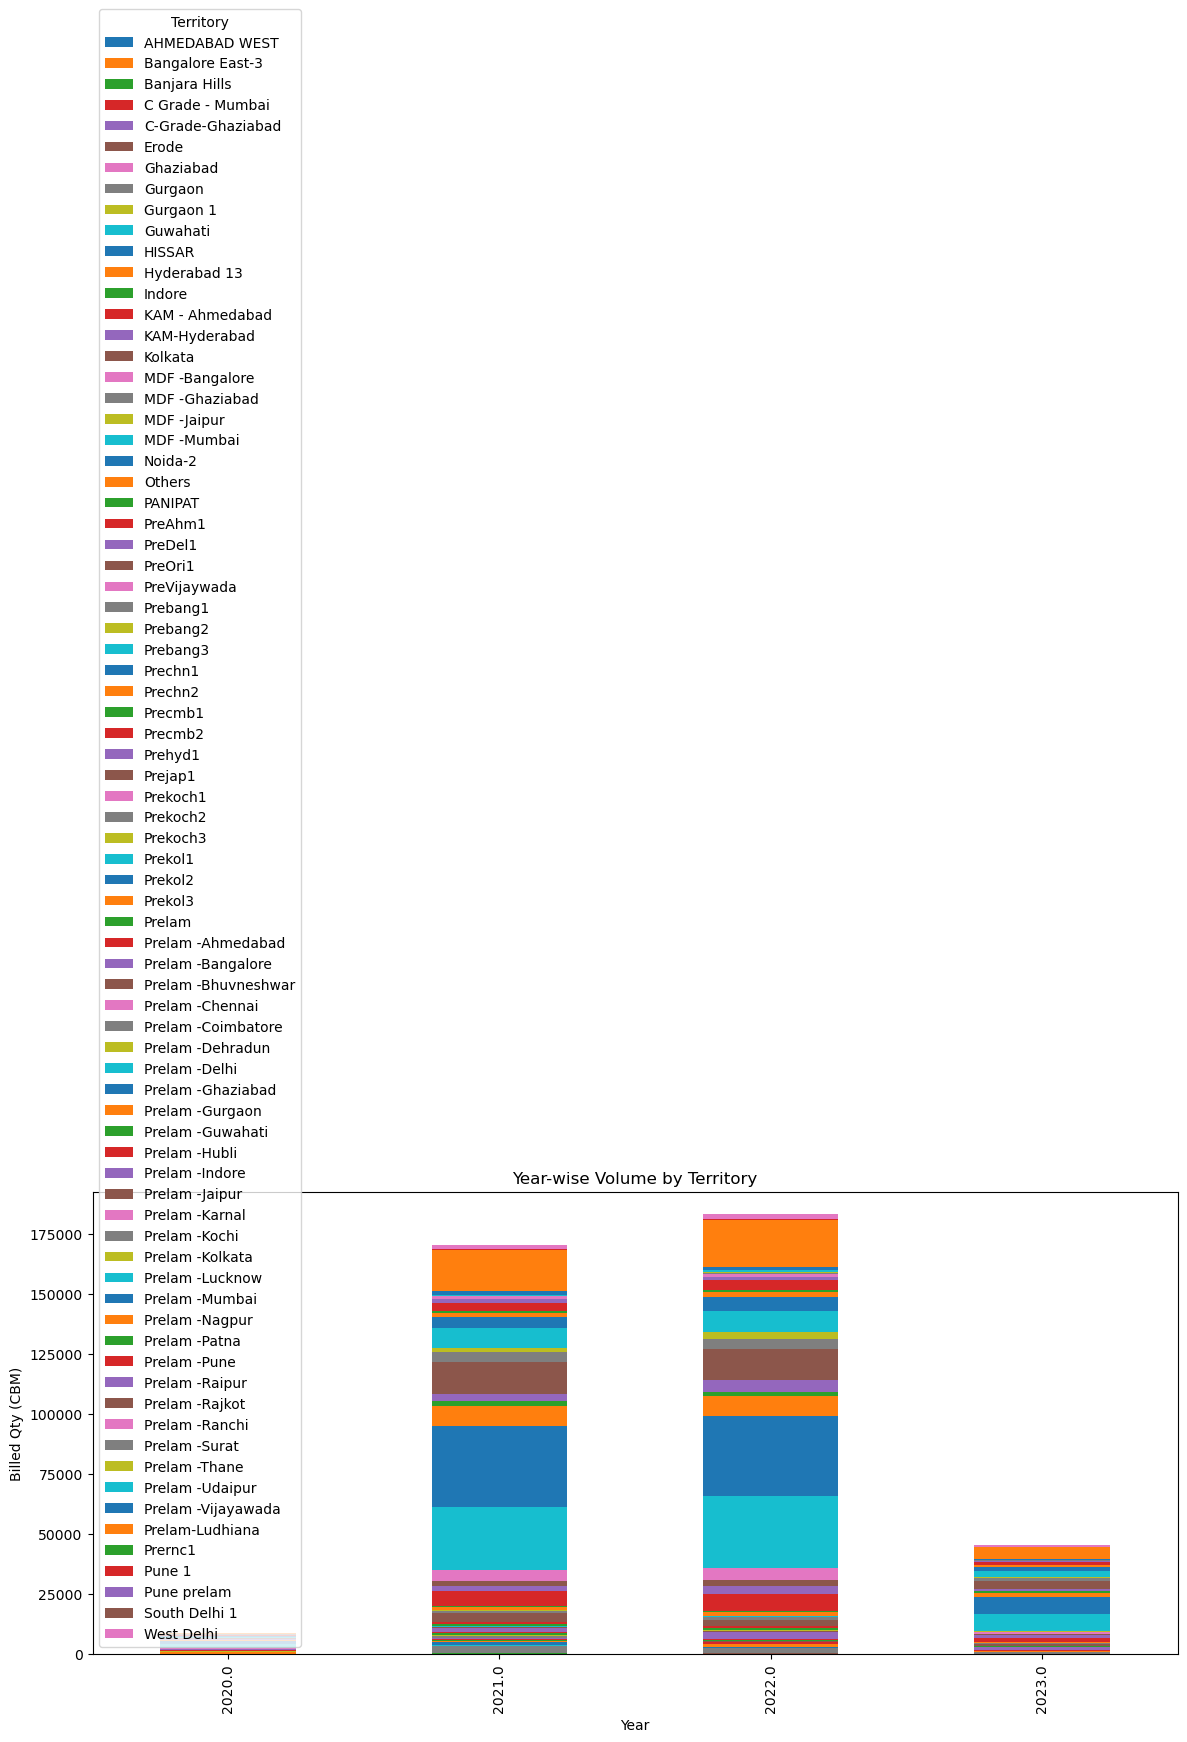

In [31]:
#  Sales by Territory per Year

# Make sure 'Territory' column exists

if "Territory" in combined_df.columns:
    territory_yearly = combined_df.groupby(["Year", "Territory"])["Billed_Qty(CBM)"].sum().unstack().fillna(0)

# Plot stacked bar chart
    
    territory_yearly.plot(kind="bar", stacked=True, figsize=(14, 6), title="Year-wise Volume by Territory")
    plt.ylabel("Billed Qty (CBM)")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()
else:
    print("'Territory' column not found in dataset.")

In [32]:
# 6. Material-wise Analysis

# number of transactions

material_analysis = combined_df.groupby("Material").agg({"Billed_Qty(CBM)": "sum", "Thickness": "mean","Date": "count"  }).rename(columns={"Billed_Qty(CBM)": "Total_Volume(CBM)", "Date": "Transaction_Count", "Thickness": "Avg_Thickness"})

In [33]:
# Sort and display top 10

top_materials = material_analysis.sort_values("Total_Volume(CBM)", ascending=False).head(10)
print("Top 10 Materials by Total Volume:\n", top_materials)

Top 10 Materials by Total Volume:
                     Total_Volume(CBM)  Avg_Thickness  Transaction_Count
Material                                                               
HMCI019PA24401220O          25175.034           1.90               8144
HMCI110PA24401220O          17768.908          11.00               6479
HMCW168AA24401220O          17509.452          16.75               6008
HMCI033PA24401220O          17456.305           3.30               7211
HMCI055PA24401220O          16587.466           5.50               6438
HMCI165PA24401220O          14675.541          16.50               4908
HMCI070PA24401220O          14521.219           7.00               4252
HMCI046PA24401220O          12246.225           4.60               4728
HMCW180AA24401220O          11262.908          18.00               4233
HACW168OBB008MA8X4          11216.429          16.75               4405
